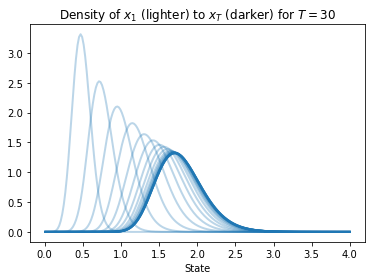

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm, beta
from quantecon import LAE

# == Define parameters == #

δ = 0.8
σ = 0.4                    
α = 0.4                 
ψ_0 = beta(5, 5, scale=0.5)  # Initial distribution
ϕ = lognorm(σ**2)


def p(x, y):
    """
    kernel for the stochastic growth model
    """
    d = x**(1-α)
    return ϕ.pdf((y - (1 - δ) * x) / d) / d

n = 10000    # Number of observations at each date t
T = 30       # Compute density of x_t at 1,...,T+1

# == Generate matrix s.t. t-th column is n observations of x_t == #
x = np.empty((n, T))
A = ϕ.rvs((n, T))
x[:, 0] = ψ_0.rvs(n)  # Draw first column from initial distribution
for t in range(T-1):
    x[:, t+1] = A[:, t] * x[:, t]**(1-α) + (1 - δ) * x[:, t]

# == Generate T instances of LAE using this data, one for each date t == #
laes = [LAE(p, x[:, t]) for t in range(T)]

# == Plot == #
fig, ax = plt.subplots()
ygrid = np.linspace(0.01, 4.0, 200)
greys = [str(g) for g in np.linspace(0.0, 0.8, T)]
greys.reverse()
for ψ, g in zip(laes, greys):
    ax.plot(ygrid, ψ(ygrid), color='C0',lw=2, alpha=0.3)
ax.set_xlabel('State')
title = r'Density of $x_1$ (lighter) to $x_T$ (darker) for $T={}$'
ax.set_title(title.format(T))
plt.show()